# Table of Contents
 <p><div class="lev1 toc-item"><a href="#DATA:" data-toc-modified-id="DATA:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>DATA:</a></div><div class="lev1 toc-item"><a href="#exploration" data-toc-modified-id="exploration-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>exploration</a></div><div class="lev2 toc-item"><a href="#plot-mass-shooting-vs-gdp-in-absolute-numbers,-and-per-person.-Show-the-errorbars-(y-errors)" data-toc-modified-id="plot-mass-shooting-vs-gdp-in-absolute-numbers,-and-per-person.-Show-the-errorbars-(y-errors)-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>plot mass shooting vs gdp in absolute numbers, and per person. Show the errorbars (y errors)</a></div><div class="lev2 toc-item"><a href="#plot-the-average-number-of-civilian-fire-arms-per-person" data-toc-modified-id="plot-the-average-number-of-civilian-fire-arms-per-person-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>plot the average number of civilian fire arms per person</a></div><div class="lev2 toc-item"><a href="#plot-the-average-number-of-homicide-by-fire-arms-per-person" data-toc-modified-id="plot-the-average-number-of-homicide-by-fire-arms-per-person-23"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>plot the average number of homicide by fire arms per person</a></div><div class="lev2 toc-item"><a href="#plot-the-number-of--homicides-by-fire-arm-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color" data-toc-modified-id="plot-the-number-of--homicides-by-fire-arm-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color-24"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>plot the number of  homicides by fire arm against the number of civilian firearms. plot the  US in a different color</a></div><div class="lev2 toc-item"><a href="#plot-the-number-of--mass-shootings-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color" data-toc-modified-id="plot-the-number-of--mass-shootings-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color-25"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>plot the number of  mass shootings against the number of civilian firearms. plot the  US in a different color</a></div><div class="lev1 toc-item"><a href="#Modeling" data-toc-modified-id="Modeling-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Modeling</a></div><div class="lev2 toc-item"><a href="#fit-a-line-to-the-Number-of-mass-shootings--per-person-as-a-function-of-Average-total-all-civilian-firearms-per-person." data-toc-modified-id="fit-a-line-to-the-Number-of-mass-shootings--per-person-as-a-function-of-Average-total-all-civilian-firearms-per-person.-31"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>fit a line to the Number of mass shootings  per person as a function of Average total all civilian firearms per person.</a></div><div class="lev2 toc-item"><a href="#Extra-credit:-calculate-the-confidence-interval-by-hand-and-also-plot-them" data-toc-modified-id="Extra-credit:-calculate-the-confidence-interval-by-hand-and-also-plot-them-32"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Extra credit: calculate the confidence interval by hand and also plot them</a></div><div class="lev2 toc-item"><a href="#Use-the-stsatsmodels.gaphics-package-to-plot-the-influence-plot." data-toc-modified-id="Use-the-stsatsmodels.gaphics-package-to-plot-the-influence-plot.-33"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Use the stsatsmodels.gaphics package to plot the influence plot.</a></div><div class="lev2 toc-item"><a href="#Extra-credit:-calculate-from-scratch-the-stanrdardized-residuals-and-the-H-leverage-for-the-WLS-model-and-discuss-if-there-are-any-differences" data-toc-modified-id="Extra-credit:-calculate-from-scratch-the-stanrdardized-residuals-and-the-H-leverage-for-the-WLS-model-and-discuss-if-there-are-any-differences-34"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Extra credit: calculate from scratch the stanrdardized residuals and the H leverage for the WLS model and discuss if there are any differences</a></div><div class="lev2 toc-item"><a href="#Discuss-your-findings" data-toc-modified-id="Discuss-your-findings-35"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Discuss your findings</a></div>

**Regression exercise**

**written by Federica B Bianco CUSP 2017 -- Modified by Bianca Brusco**

**for PUI lecture on models and linear regression**

*investigate linear relationships between fire arm possession, homicides by fire arms, and mass shootings for different countries, considering also the country GDP*

# DATA: 

The Guardian firearms murders and ownership data. The relevant sheet is uploaded in the github repository as a csv file. Download it from there. Note: this dataset is from 2012.

**Extra credit**: download directly from google docs with a google API

https://docs.google.com/spreadsheets/d/1chqUZHuY6cXYrRYkuE0uwXisGaYvr7durZHJhpLGycs/edit#gid=0

Number of mass shootings: find the link here https://datawrapper.dwcdn.net/pvLFI/4/

The world population by country find the download link here :
https://data.worldbank.org/indicator/SP.POP.TOTL

Remember that all read or downloads have to me reproducible.

Merge all datasets. After throwing away the irrelevant data it should look something like this (I renamed the GDP and the population as gdp" and "pop")

Throughout, when I ask you to include errors in plots or models, use Poisson statistics: the error is the square root of the number you are considering (e.g. this country has N fire arms +/- square root of N, or this country has Np [= N/population +/- (square root of N) / population] fire arms per person).

In [9]:
import numpy as np
import pylab as pl
import pandas as pd
import scipy.stats as st
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/biancabrusco/anaconda/lib/python3.6/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['scatter']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [10]:
url="https://raw.githubusercontent.com/fedhere/PUI2017_fb55/master/HW5_fb55/World%20firearms%20murders%20and%20ownership%20-%20Sheet%201.csv"
ms=pd.read_csv(url)
ms.rename(columns={'Country/Territory':'Country'}, inplace=True)
ms=ms[["Country","Number of homicides by firearm","Average total all civilian firearms"]]
ms =ms.dropna()

url2="https://raw.githubusercontent.com/biabbiassago/PUI2017_bb1569/master/HW5_bb1569/msdata.csv"
guardianData=pd.read_csv(url2)
guardianData=guardianData.dropna()

#join the two with info about mass shooting
ms=ms.merge(guardianData)

In [11]:
url3="https://raw.githubusercontent.com/biabbiassago/PUI2017_bb1569/master/HW5_bb1569/API_NY.GDP.csv"
gdpDf=pd.read_csv(url3, usecols=["Country Name","2012"])
gdpDf.rename(columns={'2012':'gdp'}, inplace=True)
#gdpDf.head()

url4="https://raw.githubusercontent.com/biabbiassago/PUI2017_bb1569/master/HW5_bb1569/API_SP.POP.csv"
popDf=pd.read_csv(url4, usecols=["Country Name","2012"])
popDf.rename(columns={'2012':'pop'}, inplace=True)

#join the two with general info stats about the coutry
infoDf= popDf.merge(gdpDf)
infoDf=infoDf.dropna()

In [12]:
#final merge to have our dataset!!
msDf = infoDf.merge(ms, right_on="Country", left_on="Country Name")
msDf=msDf.dropna()
msDf=msDf.drop("Country",1)
msDf.rename(columns={"Country Name":"Country"},inplace=True)
print(shape(msDf))
msDf.head(22)

(22, 7)


,Country,pop,gdp,Number of homicides by firearm,Average total all civilian firearms,Guns/100 inhabitants,Number of mass shootings
0,Australia,22728254.0,1.538194e+12,30.0,3050000.0,15.0,4
1,Austria,8429991.0,4.074516e+11,18.0,2500000.0,30.4,1
2,Canada,34750545.0,1.824289e+12,173.0,9950000.0,30.8,4
3,Switzerland,7996861.0,6.650541e+11,57.0,3400000.0,45.7,2
4,Germany,80425823.0,3.543984e+12,158.0,25000000.0,30.3,7
5,Denmark,5591572.0,3.271489e+11,15.0,650000.0,12.0,0
6,Spain,46773055.0,1.335946e+12,90.0,4500000.0,10.4,1
7,Finland,5413971.0,2.567065e+11,24.0,2400000.0,45.3,2
8,France,65659790.0,2.681416e+12,35.0,19000000.0,31.2,6
9,Greece,11045011.0,2.456707e+11,29.0,2500000.0,22.5,0


Data is imported and in correct format! I dropped the extra "Country" name colum because it seems unnecessary. Now I can begin exploration ....



# exploration

## plot mass shooting vs gdp in absolute numbers, and per person. Show the errorbars (y errors)

Use Poisson statistics for the errorbars on the number of mass shootings (optional: include errors on the population, also as Poisson statistics)

Are there any points that look like they may be outilers?


#  1-MASS SHOOTING VS GDP IN ABSOLUTE NUMBERS 

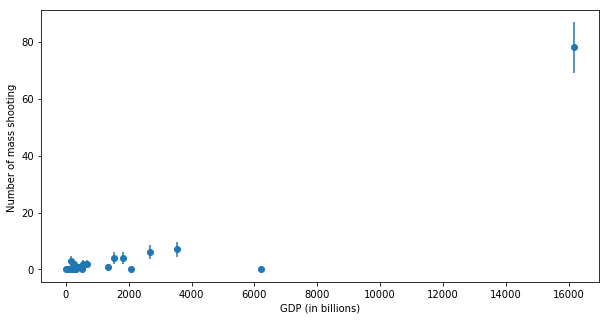

Number of mass shooting vs GDP, errors represent Poisson statistics.
The datapoint to the top right of the plot is the USA, which has noth the highest GDP and the highest number of mass shootings


In [13]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(msDf.gdp / 1e9, msDf['Number of mass shootings'])
ax.errorbar(msDf.gdp / 1e9, msDf['Number of mass shootings'], 
            yerr = np.sqrt(msDf['Number of mass shootings'] * 1.0), fmt = '.')
ax.set_xlabel("GDP (in billions)")
ax.set_ylabel("Number of mass shooting ")
ax.set_ylim()
pl.show()
print ("Number of mass shooting vs GDP, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the top right of the plot is the USA, " + 
       "which has noth the highest GDP and the highest number of mass shootings")


In [14]:
msDf['shootingspp'] =msDf["Number of mass shootings"] / msDf['pop'] * 1e3
msDf['civilianpp']= msDf['Average total all civilian firearms']/ msDf['pop']
msDf

,Country,pop,gdp,Number of homicides by firearm,Average total all civilian firearms,Guns/100 inhabitants,Number of mass shootings,shootingspp,civilianpp
0,Australia,22728254.0,1.538194e+12,30.0,3050000.0,15.0,4,0.000176,0.134194
1,Austria,8429991.0,4.074516e+11,18.0,2500000.0,30.4,1,0.000119,0.296560
2,Canada,34750545.0,1.824289e+12,173.0,9950000.0,30.8,4,0.000115,0.286326
3,Switzerland,7996861.0,6.650541e+11,57.0,3400000.0,45.7,2,0.000250,0.425167
4,Germany,80425823.0,3.543984e+12,158.0,25000000.0,30.3,7,0.000087,0.310845
5,Denmark,5591572.0,3.271489e+11,15.0,650000.0,12.0,0,0.000000,0.116246
6,Spain,46773055.0,1.335946e+12,90.0,4500000.0,10.4,1,0.000021,0.096209
7,Finland,5413971.0,2.567065e+11,24.0,2400000.0,45.3,2,0.000369,0.443298
8,France,65659790.0,2.681416e+12,35.0,19000000.0,31.2,6,0.000091,0.289370
9,Greece,11045011.0,2.456707e+11,29.0,2500000.0,22.5,0,0.000000,0.226347


#  2-MASS SHOOTING VS GDP PER PERSON 

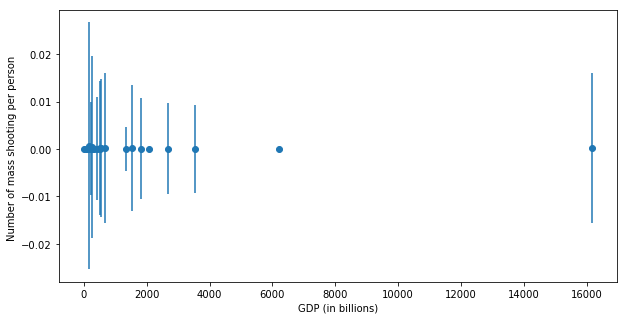

Number of mass shooting vs GDP, errors represent Poisson statistics.
The datapoint to the top right of the plot is the USA, which has noth the highest GDP and the highest number of mass shootings


In [15]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter((msDf.gdp) / 1e9, msDf['shootingspp'])
ax.errorbar(msDf.gdp/1e9, msDf['shootingspp'], yerr = np.sqrt(msDf['shootingspp'] * 1.0), fmt = '.')
ax.set_xlabel("GDP (in billions)")
ax.set_ylabel("Number of mass shooting per person ")
ax.set_ylim()
pl.show()
print ("Number of mass shooting vs GDP, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the top right of the plot is the USA, " + 
       "which has noth the highest GDP and the highest number of mass shootings")


## plot the average number of civilian fire arms per person
first without errors, then with errors. are there  points that look like outliers?

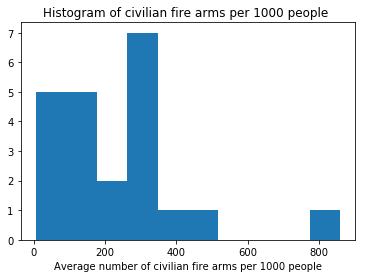

In [16]:
fig, ax = plt.subplots()
ax.hist(msDf['Average total all civilian firearms'] / msDf['pop'] * 1000)
ax.set_xlabel('Average number of civilian fire arms per 1000 people');
ax.set_title("Histogram of civilian fire arms per 1000 people ");

## plot the average number of homicide by fire arms per person
first as a histogram

then against the country GDP, with statistical errors. are there  points that look like outliers?

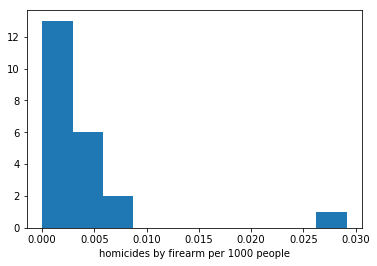

In [17]:
fig, ax = plt.subplots()
ax.hist(msDf['Number of homicides by firearm'] / msDf['pop'] * 1000)
ax.set_xlabel('homicides by firearm per 1000 people');


## plot the number of  homicides by fire arm against the number of civilian firearms. plot the  US in a different color
with and without errorbars
OK-- see below

# Plotting without errorbars

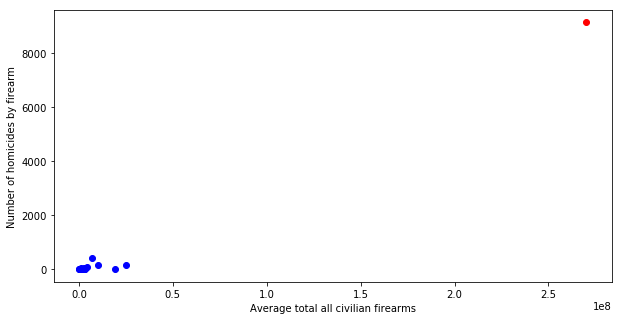

Number of homicides by firearm vs Average total all civilian firearms, errors represent Poisson statistics.
The datapoint to the top right (plotted with red color) of the plot is the USA


In [18]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

#Exclude the US note that it is the last row in the dataframe
#so I am plotting UP to length-1 first 

myData=msDf[["Average total all civilian firearms", "Number of homicides by firearm"]]
vals=myData.values
length=len(vals)
scatter = ax.scatter(vals[:(length-1), 0], vals[:(length-1), 1], color='blue')

#I am now plotting the US with RED color
ax.scatter(vals[(length-1), 0], vals[(length-1), 1],color='red')



ax.set_xlabel("Average total all civilian firearms")
ax.set_ylabel("Number of homicides by firearm")


ax.set_ylim()





pl.show()
print ("Number of homicides by firearm vs Average total all civilian firearms, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the top right (plotted with red color) of the plot is the USA")

## PLOTTING WITH ERROR BARS (Xerr and Yerr)

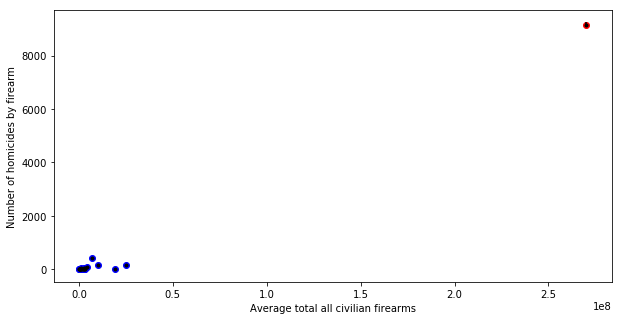

Number of homicides by firearm vs Average total all civilian firearms, errors represent Poisson statistics.
The datapoint to the top right (plotted with red color) of the plot is the USA


In [19]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

#Exclude the US note that it is the last row in the dataframe
#so I am plotting UP to length-1 first 

myData=msDf[["Average total all civilian firearms", "Number of homicides by firearm"]]
vals=myData.values
length=len(vals)
scatter = ax.scatter(vals[:(length-1), 0], vals[:(length-1), 1], color='blue')

ax.errorbar(vals[:(length-1), 0], vals[:(length-1), 1], 
            xerr= np.sqrt(vals[:(length-1), 0]*1.0),
            yerr = np.sqrt(vals[:(length-1), 1] * 1.0), color='black', fmt = '.')

#I am now plotting the US with RED color
ax.scatter(vals[(length-1), 0], vals[(length-1), 1],color='red')

ax.errorbar(vals[(length-1), 0], vals[(length-1), 1], 
            xerr= np.sqrt(vals[(length-1), 0] * 1.0),
            yerr = np.sqrt(vals[(length-1), 1] * 1.0), color='black', fmt = '.')

#I always used black color for plotting error bars


ax.set_xlabel("Average total all civilian firearms")
ax.set_ylabel("Number of homicides by firearm")


ax.set_ylim()





pl.show()
print ("Number of homicides by firearm vs Average total all civilian firearms, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the top right (plotted with red color) of the plot is the USA")

## plot the number of  mass shootings against the number of civilian firearms. plot the  US in a different color
with and without errorbars


## without errorbars

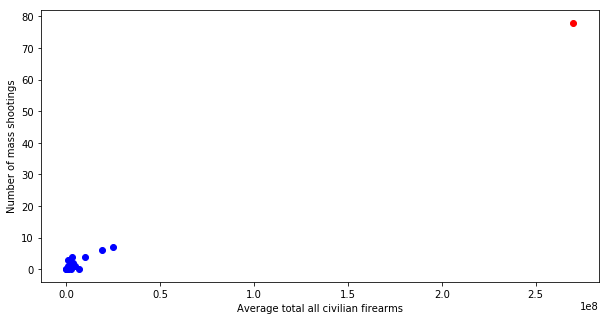

Number of mass shootings vs Average total all civilian firearms, errors represent Poisson statistics.
The datapoint to the top right (plotted with red color) of the plot is the USA


In [20]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

#Exclude the US note that it is the last row in the dataframe
#so I am plotting UP to length-1 first 

myData=msDf[["Average total all civilian firearms", "Number of mass shootings"]]
vals=myData.values
length=len(vals)
scatter = ax.scatter(vals[:(length-1), 0], vals[:(length-1), 1], color='blue')

#I am now plotting the US with RED color
ax.scatter(vals[(length-1), 0], vals[(length-1), 1],color='red')

ax.set_xlabel("Average total all civilian firearms")
ax.set_ylabel("Number of mass shootings")


ax.set_ylim()





pl.show()
print ("Number of mass shootings vs Average total all civilian firearms, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the top right (plotted with red color) of the plot is the USA")

## With Error Bars

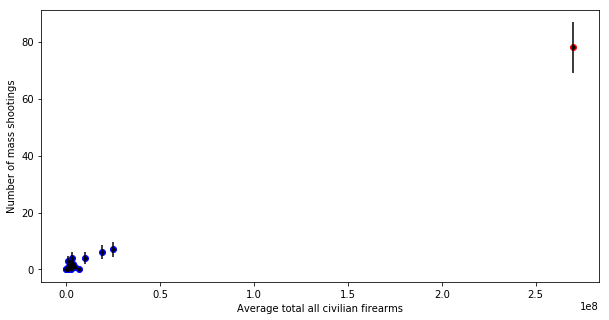

Number of mass shootings vs Average total all civilian firearms, errors represent Poisson statistics.
The datapoint to the top right (plotted with red color) of the plot is the USA


In [21]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

#Exclude the US note that it is the last row in the dataframe
#so I am plotting UP to length-1 first 

myData=msDf[["Average total all civilian firearms", "Number of mass shootings"]]
vals=myData.values
length=len(vals)
scatter = ax.scatter(vals[:(length-1), 0], vals[:(length-1), 1], color='blue')

ax.errorbar(vals[:(length-1), 0], vals[:(length-1), 1], 
            xerr= np.sqrt(vals[:(length-1), 0]*1.0),
            yerr = np.sqrt(vals[:(length-1), 1] * 1.0), color='black', fmt = '.')

#I am now plotting the US with RED color
ax.scatter(vals[(length-1), 0], vals[(length-1), 1],color='red')

ax.errorbar(vals[(length-1), 0], vals[(length-1), 1], 
            xerr= np.sqrt(vals[(length-1), 0] * 1.0),
            yerr = np.sqrt(vals[(length-1), 1] * 1.0), color='black', fmt = '.')

#I always used black color for plotting error bars


ax.set_xlabel("Average total all civilian firearms")
ax.set_ylabel("Number of mass shootings")
ax.set_ylim()


pl.show()
print ("Number of mass shootings vs Average total all civilian firearms, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the top right (plotted with red color) of the plot is the USA")

# Modeling

## fit a line to the Number of mass shootings  per person as a function of Average total all civilian firearms per person. 
Before you do it it is a good idea to make sure that both quantities are roughly of the same order of magnitude (unity). (You can simply divide by the order of magnitude of the mean of the sample to obtain this). Use

    - statsmodels OLS
    - statsmodels WLS
    - seaborn
    - choose one of
        -- creating a function that calculates the residuals and minimizing that function
        -- analytical solution http://mathworld.wolfram.com/LeastSquaresFitting.html
        -- numpy.polyfit() - https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.polyfit.html
    

WLS: that is the weighted square fit. The statsmodel package WLS function allows you to take the uncertainties of each data point into account when you fit your model. It takes the parameter weights, which is the inverse of your errors:
weights = 1.0/df.yerror
Notice that 
    a - sqrt(0) = 0
    b - 1/0 = infinity
    c - you cannot have weight that are infinity in your fit. Please come up with a solution and justify it.


the latter three you can learn about in this example: https://github.com/fedhere/PUI2017_fb55/blob/master/Lab5_fb55/genderIncomeBias.ipynb
Since we did not discuss these, I will add some notes to the repo in the afternoon.

Use the seaborn python package built in regression function  to plot the regression confidence intervals. 

import seaborn  as sns
sns.regplot(x="x", y="y", data=df);




In [22]:
#THE ABOVE PARAGRAPH MEANS THE INDEPENDENT VARIABLE IS SHOOTINGS DEPENDENT ONE IS CIVILIAN
msDf.describe()

,pop,gdp,Number of homicides by firearm,Average total all civilian firearms,Guns/100 inhabitants,Number of mass shootings,shootingspp,civilianpp
count,2.200000e+01,2.200000e+01,22.000000,2.200000e+01,22.000000,22.000000,22.000000,22.000000
mean,3.967568e+07,1.801258e+12,470.863636,1.628523e+07,24.086364,5.090909,0.000121,0.228950
std,6.922051e+07,3.528211e+12,1939.821599,5.701791e+07,19.483456,16.411114,0.000165,0.187842
min,3.207160e+05,1.421858e+10,0.000000,7.000000e+04,0.600000,0.000000,0.000000,0.005563
25%,5.458371e+06,2.307821e+11,12.000000,6.650000e+05,10.775000,0.000000,0.000000,0.101219
50%,1.021760e+07,5.050246e+11,29.500000,2.450000e+06,22.550000,1.000000,0.000089,0.218094
75%,4.459558e+07,1.752765e+12,53.750000,4.225000e+06,31.100000,2.750000,0.000193,0.292945
max,3.139984e+08,1.615526e+13,9146.000000,2.700000e+08,88.800000,78.000000,0.000681,0.859877


In [23]:
# IDENTIFY THE MEAN OF THE DATA

msDf["civilianpp"]=(msDf["civilianpp"]*1e1)
msDf["shootingspp"]=(msDf["shootingspp"] * 1e4)

my_df=msDf[['shootingspp', 'civilianpp']]

my_df

,shootingspp,civilianpp
0,1.759924,1.341942
1,1.186241,2.965602
2,1.151061,2.863264
3,2.500981,4.251668
4,0.870367,3.108454
5,0.000000,1.162464
6,0.213798,0.962092
7,3.694146,4.432975
8,0.913801,2.893704
9,0.000000,2.263465


In [24]:
#Let's make each column an array

shootings=(my_df.shootingspp.values)
civilian=(my_df.civilianpp.values)

print(shootings, civilian)

[ 1.75992401  1.18624089  1.15106108  2.50098132  0.87036722  0.
  0.21379831  3.69414613  0.91380128  0.          0.          0.          0.
  0.          0.          0.          1.99259829  6.80565323  0.
  0.95103646  2.10097849  2.48408926] [ 1.34194206  2.96560222  2.86326445  4.25166825  3.10845436  1.16246379
  0.96209238  4.43297535  2.89370405  2.26346538  0.56449553  0.78484431
  2.80622108  1.1756858   0.05562999  1.31840149  2.78963761  2.09840975
  0.13398781  0.85593281  2.94136988  8.59877051]


In [25]:
from __future__ import print_function, division
import sys
import os
import numpy 
import pylab as pl
import pandas as pd
from scipy import stats
from scipy.optimize import minimize
import statsmodels.api as sm
import json
import os


In [26]:
#pl.plot(newx, np.poly1d(np.ployfit(x, y, 1))(newx)

def line (x, pars):
    '''Creates the dependent variables of a line
    Arguments:
        x: series, independent variable
        pars: series of 2 paramters, slope and intercept
    Return:
        dependent variable array
    '''
    if not isinstance(x, numpy.ndarray) and not isinstance(x, int) \
        and not isinstance(x, float):
        print ('You must pass an array or a single number for the dependent variable')
    if not pars.shape == (2,):
        print ('You must pass a 1D series of 2 parameters in pars')
    a, b = pars
    y = a * x + b
    #this would be a function that creates a line given parameters, 
    #like we did in class
    ...
    return y

def residuals(pars, data, model, error=None):
    '''Calculates the residuals between model and data
    Arguments:
        data: series - 1D array of datapoints
        model: series - 1D array of model predictions
        error (optional): series - 1D array of errors on data 
    Returns:
        sum of residuals square
    '''
    residuals = (line(data, pars) - model)**2
    if error:
        residuals = residuals / error**2
    
    return residuals.sum()

p0 = (0.5,1000)

#here the model is the female income given the male income: a regression line
##important!! never work with very large numbers! always try to reduce your numbers to ~unity
result = minimize(residuals, p0, args=(civilian, shootings))
result

      fun: 45.59286837138717
 hess_inv: array([[ 0.00674835, -0.01545106],
       [-0.01545106,  0.05810508]])
      jac: array([  9.53674316e-07,   4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 36
      nit: 5
     njev: 9
   status: 0
  success: True
        x: array([ 0.39106003,  0.31488028])

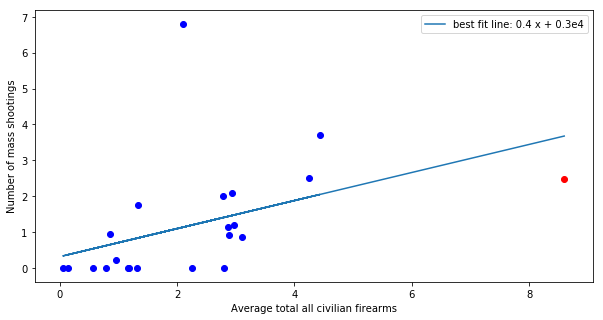

Number of mass shootings vs Average total all civilian firearms, errors represent Poisson statistics.
The datapoint to the top right (plotted with red color) of the plot is the USA


In [27]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)


pl.plot(civilian, civilian* result.x[0] + result.x[1], label="best fit line: %.1f x + %.1fe4"\
       %(result.x[0], result.x[1]))
pl.legend(loc='best')



#Exclude the US note that it is the last row in the dataframe
#so I am plotting UP to length-1 first 

myData=my_df[["shootingspp", "civilianpp"]]
vals=myData.values
length=len(vals)
scatter = ax.scatter(vals[:(length-1), 1], vals[:(length-1), 0], color='blue')

#I am now plotting the US with RED color
ax.scatter(vals[(length-1), 1], vals[(length-1), 0],color='red')



ax.set_ylabel("Number of mass shootings")
ax.set_xlabel("Average total all civilian firearms")
ax.set_ylim()

pl.show()

print ("Number of mass shootings vs Average total all civilian firearms, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the top right (plotted with red color) of the plot is the USA")





In [28]:
Y = shootings
X = civilian
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
a=results.params
a

array([ 0.31488026,  0.39106003])

In [29]:
errors = model.fit().resid
#to use later in the wls model

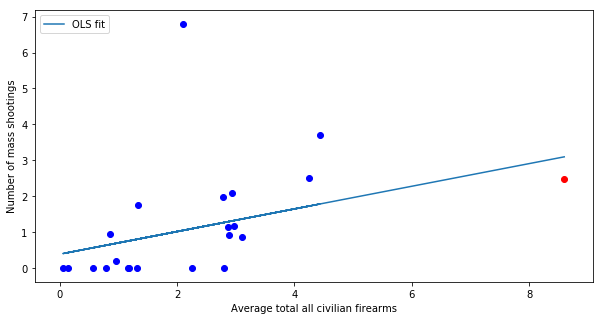

Number of mass shootings vs Average total all civilian firearms, errors represent Poisson statistics.
The datapoint to the top right (plotted with red color) of the plot is the USA


In [30]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)


pl.plot(civilian, civilian* a[0] + a[1], label="OLS fit")
pl.legend(loc=2)



#Exclude the US note that it is the last row in the dataframe
#so I am plotting UP to length-1 first 

myData=my_df[["shootingspp", "civilianpp"]]
vals=myData.values
length=len(vals)
scatter = ax.scatter(vals[:(length-1), 1], vals[:(length-1), 0], color='blue')

#I am now plotting the US with RED color
ax.scatter(vals[(length-1), 1], vals[(length-1), 0],color='red')



ax.set_ylabel("Number of mass shootings")
ax.set_xlabel("Average total all civilian firearms")
ax.set_ylim()

pl.show()

print ("Number of mass shootings vs Average total all civilian firearms, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the top right (plotted with red color) of the plot is the USA")





In [31]:
#weight = 1/np.sqrt(shootings)
#weight
#We decided to calculate the errors through residuals of the Y from OLS. 

In [32]:
# delete if doesn't work
weight = 1/np.sqrt(abs(errors))
weight

array([ 1.0424226 ,  1.86220102,  1.87802959,  1.38218152,  1.23081672,
        1.13999566,  1.44742533,  0.77951383,  1.37013174,  0.9128591 ,
        1.36636517,  1.26816019,  0.84147151,  1.13618466,  1.72353622,
        1.09734226,  1.30543158,  0.41995428,  1.6500717 ,  1.82139064,
        1.25407648,  0.91538157])

In [33]:
for i in range (len (weight)):
    if weight[i] == inf:
        weight[i] = 0
        
weight

array([ 1.0424226 ,  1.86220102,  1.87802959,  1.38218152,  1.23081672,
        1.13999566,  1.44742533,  0.77951383,  1.37013174,  0.9128591 ,
        1.36636517,  1.26816019,  0.84147151,  1.13618466,  1.72353622,
        1.09734226,  1.30543158,  0.41995428,  1.6500717 ,  1.82139064,
        1.25407648,  0.91538157])

In [34]:
X = sm.add_constant(X)
wls_model = sm.WLS(Y,X,weights=weight)
results = wls_model.fit()
b=results.params
b

array([ 0.10580686,  0.41182537])

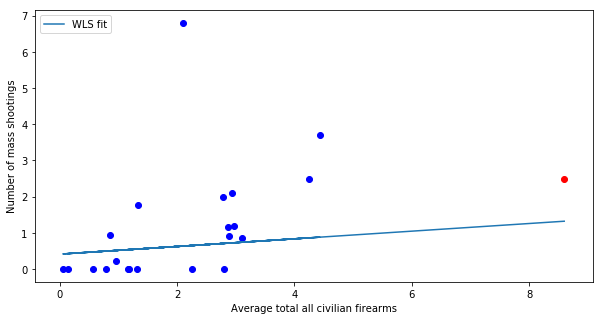

Number of mass shootings vs Average total all civilian firearms, errors represent Poisson statistics.
The datapoint to the top right (plotted with red color) of the plot is the USA


In [35]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)


pl.plot(civilian, civilian* b[0] + b[1], label="WLS fit")
pl.legend(loc=2)



#Exclude the US note that it is the last row in the dataframe
#so I am plotting UP to length-1 first 

myData=my_df[["shootingspp", "civilianpp"]]
vals=myData.values
length=len(vals)
scatter = ax.scatter(vals[:(length-1), 1], vals[:(length-1), 0], color='blue')

#I am now plotting the US with RED color
ax.scatter(vals[(length-1), 1], vals[(length-1), 0],color='red')



ax.set_ylabel("Number of mass shootings")
ax.set_xlabel("Average total all civilian firearms")
ax.set_ylim()

pl.show()

print ("Number of mass shootings vs Average total all civilian firearms, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the top right (plotted with red color) of the plot is the USA")





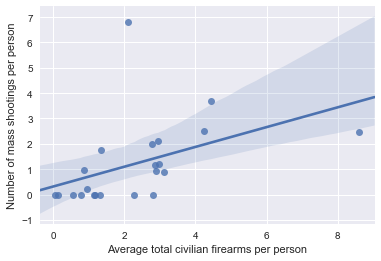

In [36]:
pl.figure()
import seaborn as sns
sns.regplot(x='civilianpp',  y='shootingspp',data=myData)

pl.ylabel("Number of mass shootings per person")
pl.xlabel("Average total civilian firearms per person")


In [37]:
model2= model.fit()

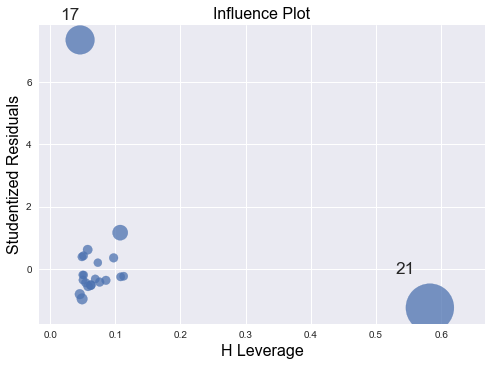

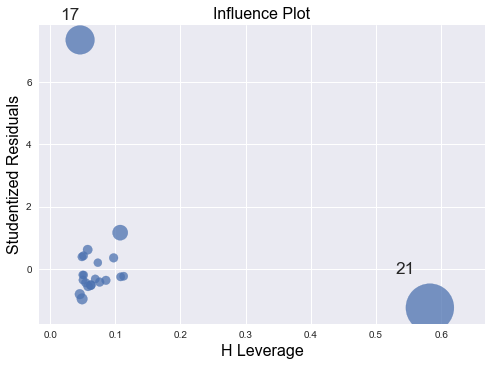

In [38]:
sm.graphics.influence_plot(model2, alpha=0.05, criterion="cooks")

## Extra credit: calculate the confidence interval by hand and also plot them 
you can use pylab.fill_between(x, yfit - ci, yfit + ci, alpha=0.5)

**Confidence intervals: **
there are three type of intervals in a linear regression, plot any one of them all three if you want - how do they compare to the seaborn plot?:

1) Confidence intervals for the parameters slope and intercept

2) Confidence interval for the average y value

3) Prediction interval for a single y value

1) __confidence interval of the  model parameters slope and intercept:__
define sigma as the sum of the residuals over the square root of number n of observations. 

sigma: ÏƒÌ‚ =sqrt(Sum((Yoberved_iâˆ’Ypredicted_i)^2)/n)

where the sum is over all observations

Define t_alpha/2,n-2 the t statistics at (1-alpha/2) for a t distribution with n-2 degrees of freedom (you can calculate it with scipy
tp = sp.stats.t.ppf(0.975, n-2)



from IPython.display import Image
Image(filename="../Lab5_fb55/confidence_intervals_regression.png")

from IPython.display import Image
Image(filename="../Lab5_fb55/confidence_intervals_regression2.png")

[proof](https://onlinecourses.science.psu.edu/stat414/node/280)

2) **A confidence interval for E(y | x) , the expected (average) value of y for a given x_**

define s: residual standard error sy = sqrt(Sum((y_observed-y_predicted)^2)/(n-2))

(note: n-2 is the degrees of freedom of the problem: observations - number of parameters - 1)

the confidence interval for a given y(x*) is: 

y_predicted(x*) +/- t_(alpha/2)(n-2) * sy * sqrt( 1/n + (x* - mean(x)^2) / sum((x* - mean(x)^2)

from IPython.display import Image
Image(filename="../Lab5_fb55/ciY.png")

3) **Confidence intervals for average y (predicted) values**

y_predicted(x*) +/- t_(n-2) * sy * sqrt( 1 + 1/n + (x* - mean(x)^2) / sum((x* - mean(x)^2)

very similar, but note the +1 in the square root

from IPython.display import Image
Image(filename="../Lab5_fb55/ciYaverage.png")

## Use the stsatsmodels.gaphics package to plot the influence plot. 
Read the package documentation to learn how to read this plot and extract the countries with the highest influence

This is the topic of this week's assigned reading, so make sure you do the reading before you do this step. It will help you interpret the plot.

THIS IS DONE ABOVE... 

## Extra credit: calculate from scratch the stanrdardized residuals and the H leverage for the WLS model and discuss if there are any differences

## Discuss your findings

Our exploratory plots tell us that when plotting GDP vs mass shooting, the U.S. stands as a clear outlier, having the highest GDP and the highest number of mass shootings. 

Our regressions are looking at the correlation between mass shootings and average number of firearms by civilians per person. Through all the three types of regression (best fit, OLS, WLS) we find a beta positive slope -- there is positive correlation between the average number of fire arms and the average number of mass shootings per person.

Importantly, when we included the inverse-variance weights into the regression model, the slope of the fitted line decreased three fold. This better characterizes the relationship between firearm ownership and mass shootings by downweighting the influence of the higher-variance data point 21 (US). The influence plots show the large influence point 17 and 21 have on the spread of the data.